# Project: Wrangling and Analyze Data

## Data Gathering

In [124]:
#import libraries to be used
import pandas as pd
import numpy as np
import requests
import json

In [125]:
twitter_archive=pd.read_csv('twitter-archive-enhanced (1).csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [126]:
#import the image_prediction data

#import the URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions (3).tsv', mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image-predictions (3).tsv',sep="\t")

In [127]:
#Read the first five line of image prediction
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [128]:
import tweepy

consumer_key = 'Key'
consumer_secret = 'Key'
access_token = 'key'
access_secret = 'key'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [129]:
#define an empty lists to store tweets
tweets_json = []
#we define an empty list if tweets ids can't be found
tweet_id_missing = []
with open('tweet_json_2.txt', 'a', encoding = 'utf-8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            data = api.get_status(tweet_id, tweet_mode = 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
            json.dump(data, file)
            file.write('\n')
            tweets_json.append(tweet_id)
        except Exception as e:
            tweet_id_missing.append(tweet_id)
            print(f'{tweet_id}: {e}')

In [130]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open('tweet_json_2.txt', 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': tweet_id, 
                     'retweet_count': retweet_count, 
                     'favorite_count': favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

In [131]:
# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_json = pd.DataFrame(tweet_json_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [132]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6983,33751
1,892177421306343426,5286,29282
2,891815181378084864,3469,22014
3,891689557279858688,7210,36867
4,891327558926688256,7736,35242


## Assessing Data


Assessing the twitter_archive data set

In [133]:
#open the twitter archive data for visual assessment
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,None,None,None
1129,729463711119904772,NaN,NaN,2016-05-09 00:11:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pupcasso. You can't afford his art. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729463711...,13,10,Pupcasso,None,None,None,None
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11,10,Duke,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take a moment and appreciate how these two dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673317986...,10,10,None,None,None,None,None


In [134]:
#check the summary of the data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [135]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [136]:
#check numerator not 10
num=twitter_archive[twitter_archive['rating_denominator'] !=10]
print(num.shape)
num.head()

(23, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


Assessing the Image_prediction data set

In [137]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
431,674271431610523648,https://pbs.twimg.com/media/CVt-SeMWwAAs9HH.jpg,1,German_shepherd,0.991454,True,malinois,0.004150,True,bloodhound,0.003019,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False
1260,748705597323898880,https://pbs.twimg.com/ext_tw_video_thumb/74870...,1,tiger_shark,0.548497,False,great_white_shark,0.130252,False,scuba_diver,0.121887,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


In [138]:
#summary of the data
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [139]:
#statistical summary
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Assessing the Twitter_json data set

In [140]:
df_tweet_json.sample(5)

,tweet_id,retweet_count,favorite_count
2169,668815180734689280,226,494
2032,671166507850801152,301,780
1562,686618349602762752,1238,3409
475,813202720496779264,1703,8757
1916,673707060090052608,346,990


In [141]:

df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [142]:
#statistical summary
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2464.681994,7040.537172
std,6.820795e+16,4173.617686,10941.401283
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1221.500000
50%,7.178418e+17,1148.000000,3045.000000
75%,7.986547e+17,2852.500000,8582.000000
max,8.924206e+17,70524.000000,144572.000000


In [143]:
all_columns = pd.Series(list(df_tweet_json) + list(twitter_archive) + list(image_pred))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

### Quality issues
#### df_archive
1. Drop columns thats has a lot of null values, or that are irrelevant to the data analysis such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id.
2. Changing rating for twitter ids that were erroneously captured eg chnage rating of twitter id 835246439529840000 from 960/0 to 13/10, twitter id 775096608509886000 from 9/111 to 14/10, twitter id 716439118184652000 from 50/50 to 11/10.
3. Drop rows that have a denominator that isn't 10.
4. Remove +0000 from timestamp data.
5. Change timestamp into datetime data type.
6. Remove rows with missing values if needed.
7. Remove rows with rating_numerator above 20.

##### image-predictions

1. Drop the img_num column because it will not be useful in the analysis.
 

### Tidiness issues
1. The four columns doggo, floofer, pupper, puppo should be converted to one column named dog stage.

2. Merge all the datasets to form one master data.

## Cleaning Data

In [144]:
# Make copies of original pieces of data
df_archive=twitter_archive.copy()
df_image_pred=image_pred.copy()
df_tweet_json_copy=df_tweet_json.copy()

#### Define:
Drop columns thats has a lot of null values, Or that are irrelevant

#### Code

In [145]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
1306,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,None,None


In [146]:
print(df_archive.shape)
df_archive.isnull().sum()

(2356, 17)


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [147]:
drp=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 'expanded_urls']

for columns in drp:
    df_archive.drop(columns=columns, axis=1, inplace=True)

#### Test

In [148]:
df_archive.isnull().sum()

tweet_id              0
timestamp             0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #2:

#### Define
Drop rows that have a denominator that isn't 10.

#### Code

In [149]:
i=df_archive[df_archive['rating_denominator'] != 10]
print(i.shape)
i

(23, 10)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06 +0000,"RT @dog_rates: After so many requests, this is...",9,11,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None


In [150]:
#change numerator
def numerator(i, n, d):
    df_archive.loc[df_archive.tweet_id == i, ['rating_numerator', 'rating_denominator']] = [n, d]


Change rating of twitter id 835246439529840000 from 960/0 to 13/10.
Change rating of twitter id 775096608509886000 from 9/11 to 14/10
Change raring of twitter id 716439118184652801 from 50/50 to 11/10

In [151]:
numerator(835246439529840640, 13, 10)
numerator(740373189193256964, 14, 10)
numerator(716439118184652801, 11, 10)
numerator(682962037429899265, 10, 10)

#### Test

In [152]:
#check if the number of data with denominator being not 10 has changes
i=df_archive[df_archive['rating_denominator'] != 10]
print(i.shape)

(19, 10)


### Define
Drop rows that have a denominator that isn't 10.

### Code

In [153]:
df_archive=df_archive[df_archive['rating_denominator']==10]

### Test

In [154]:
#The outcome should be 0
i=df_archive[df_archive['rating_denominator'] != 10]
print(i.shape)

(0, 10)


### Define
Remove rows with rating_numerator above 20

### Code

In [155]:
i=df_archive[df_archive['rating_numerator']>20]
print(i.shape)
i

(9, 10)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,2017-04-22 19:15:32 +0000,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,@s8n You tried very hard to portray this good ...,666,10,None,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52 +0000,@markhoppus 182/10,182,10,None,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49 +0000,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood...,420,10,None,None,None,None,None


In [156]:
df_archive=df_archive[df_archive['rating_numerator']<20]

In [158]:
#test
i=df_archive[df_archive['rating_numerator']>20]
print(i.shape)

(0, 10)


### Define 
Change timestamp into datetime data type.

### Code

In [159]:
df_archive['timestamp'] = df_archive['timestamp'].astype('datetime64[ns]')

### Test

In [160]:
df_archive['timestamp'].dtypes

dtype('<M8[ns]')

### Define
Change the new date and time into the correct data type and drop the Timestamp column.

In [161]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2328 non-null int64
timestamp             2328 non-null datetime64[ns]
text                  2328 non-null object
rating_numerator      2328 non-null int64
rating_denominator    2328 non-null int64
name                  2328 non-null object
doggo                 2328 non-null object
floofer               2328 non-null object
pupper                2328 non-null object
puppo                 2328 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 200.1+ KB


### Define
The four columns doggo, floofer, pupper, puppo should be converted to one column named dog stage

In [162]:
df_archive.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


In [163]:
#Select data that is classified and replace None with nan
arc_temp=df_archive[~((df_archive['doggo'] != 'doggo') & (df_archive['floofer'] != 'floofer') & (df_archive['pupper'] != 'pupper') 
                       & (df_archive['puppo'] != 'puppo'))].replace('None', np.nan)
print(arc_temp.shape)
arc_temp.head()

(379, 10)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,NaN,NaN,NaN
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,NaN,NaN,NaN,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,NaN,NaN,NaN,puppo
29,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,NaN,NaN,pupper,NaN
43,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,NaN,NaN,NaN


In [164]:
#melt tha data
v=['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name']
arc_temp=pd.melt(arc_temp, id_vars=v, var_name='var_name', value_name='dog_name')
print(arc_temp.shape)
arc_temp.head()

(1516, 8)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,var_name,dog_name
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,doggo
1,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,NaN,doggo,NaN
2,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,doggo,NaN
3,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,doggo,NaN
4,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,doggo


In [165]:
#drop rows with unclassified dog names
arc_temp.dropna(subset=['dog_name'], inplace = True)

In [166]:
arc_temp.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,var_name,dog_name
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,doggo
4,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,doggo
15,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,12,10,NaN,doggo,doggo
17,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,doggo
18,871102520638267392,2017-06-03 20:33:19,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,NaN,doggo,doggo


In [167]:
arc_temp=arc_temp[['tweet_id', 'dog_name']]
arc_temp.head()

,tweet_id,dog_name
0,890240255349198849,doggo
4,884162670584377345,doggo
15,872967104147763200,doggo
17,871515927908634625,doggo
18,871102520638267392,doggo


In [168]:
#merge with the original data set
df_archive = df_archive.merge(arc_temp, on='tweet_id', how='left')
df_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_name
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN


In [169]:
df_archive.dog_name.fillna('not classified', inplace=True)
df_archive.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_name
2086,670717338665226240,2015-11-28 21:34:09,*screams for a little bit and then crumples to...,12,10,None,None,None,None,None,not classified
872,761371037149827077,2016-08-05 01:19:35,RT @dog_rates: Oh. My. God. 13/10 magical af h...,13,10,None,None,None,None,None,not classified
1046,743545585370791937,2016-06-16 20:47:36,Say hello to Bentley and Millie. They do every...,11,10,Bentley,None,None,None,None,not classified
138,865718153858494464,2017-05-19 23:57:46,Meet Boomer. He's just checking pup on you. Ho...,13,10,Boomer,None,None,None,None,not classified
1855,675334060156301312,2015-12-11 15:19:21,Good morning here's a grass pupper. 12/10 http...,12,10,None,None,None,pupper,None,pupper


In [170]:
df_archive.shape

(2342, 11)

In [171]:
df_archive['dog_name'].value_counts()

not classified    1949
pupper             256
doggo               97
puppo               30
floofer             10
Name: dog_name, dtype: int64

In [172]:
#remove more rows that would be relevant
df_archive.drop(columns=['timestamp', 'text', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'], 
                 axis=1, inplace=True)

## Image prediction data set cleaning

In [173]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [174]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define
Drop the img_num column

In [175]:
# Code
df_image_pred.drop(columns=['img_num'], axis=1, inplace=True)

In [176]:
#Test
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Define
Merge the 3 datasets

In [177]:
#code
df = df_archive.merge(df_tweet_json_copy, on='tweet_id', how='left')

In [178]:
df=df.merge(df_image_pred, on='tweet_id', how='left')

### Test

In [179]:
df.sample(5)

,tweet_id,rating_numerator,dog_name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
57,881268444196462592,12,not classified,4486.0,20456.0,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
1713,680100725817409536,11,pupper,1247.0,3301.0,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,golden_retriever,0.698961,True,chow,0.145971,True,Pomeranian,0.034888,True
933,753655901052166144,10,not classified,1992.0,5451.0,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
1759,678380236862578688,10,not classified,822.0,2241.0,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
1190,718234618122661888,11,not classified,913.0,3562.0,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True


In [180]:
print(df.shape)
df.info()

(2342, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 15 columns):
tweet_id            2342 non-null int64
rating_numerator    2342 non-null int64
dog_name            2342 non-null object
retweet_count       2314 non-null float64
favorite_count      2314 non-null float64
jpg_url             2068 non-null object
p1                  2068 non-null object
p1_conf             2068 non-null float64
p1_dog              2068 non-null object
p2                  2068 non-null object
p2_conf             2068 non-null float64
p2_dog              2068 non-null object
p3                  2068 non-null object
p3_conf             2068 non-null float64
p3_dog              2068 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 292.8+ KB


In [181]:
#df.dropna(inplace=True)
#arc_temp.dropna(subset=['dog_name'], inplace = True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [182]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [183]:
df=pd.read_csv('twitter_archive_master.csv')
df.sample(5)

,tweet_id,rating_numerator,dog_name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1412,681523177663676416,12,not classified,5200.0,13164.0,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True
1151,700462010979500032,6,not classified,1624.0,3788.0,https://pbs.twimg.com/media/CbiKe7-W0AIVNNr.jpg,hamster,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False
1548,675888385639251968,10,not classified,841.0,2118.0,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,West_Highland_white_terrier,0.672117,True,Old_English_sheepdog,0.146147,True,komondor,0.023141,True
1122,703425003149250560,9,not classified,1221.0,3501.0,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
1775,670838202509447168,4,not classified,598.0,983.0,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,flamingo,0.992710,False,coral_fungus,0.003491,False,stinkhorn,0.001859,False


In [184]:
print(df.shape)
df.info()

(2050, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 15 columns):
tweet_id            2050 non-null int64
rating_numerator    2050 non-null int64
dog_name            2050 non-null object
retweet_count       2050 non-null float64
favorite_count      2050 non-null float64
jpg_url             2050 non-null object
p1                  2050 non-null object
p1_conf             2050 non-null float64
p1_dog              2050 non-null bool
p2                  2050 non-null object
p2_conf             2050 non-null float64
p2_dog              2050 non-null bool
p3                  2050 non-null object
p3_conf             2050 non-null float64
p3_dog              2050 non-null bool
dtypes: bool(3), float64(5), int64(2), object(5)
memory usage: 198.3+ KB


In [185]:
df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2.050000e+03,2.050000e+03
mean,7.382497e+17,10.593659,2382.269756,7485.010244,0.595179,1.350332e-01,6.037945e-02
std,6.769808e+16,2.175165,4155.856563,11315.299048,0.271369,1.008776e-01,5.114436e-02
min,6.660209e+17,0.000000,11.000000,0.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.763054e+17,10.000000,501.250000,1395.250000,0.363272,5.361625e-02,1.605313e-02
50%,7.119835e+17,11.000000,1117.500000,3295.000000,0.589039,1.190060e-01,4.928135e-02
75%,7.931770e+17,12.000000,2723.750000,9283.500000,0.844920,1.964605e-01,9.266568e-02
max,8.924206e+17,15.000000,70524.000000,144572.000000,1.000000,4.880140e-01,2.734190e-01


### Insights:
1. There is a positive linear correlation between retweet_count and favourite_count

2. Dogs that receive a higher rating consequently receive a higher number of retweets and likes

3. Doggo and puppo have a higher rating and number of retweets compared to other dog classifications.

### Visualization

Plot histogram to show the distribution of numerical variables

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [187]:
#import visualization libraries
def hist_plot(x, y):
    plt.hist(data=df, x=x, bins=y, edgecolor = "black")

Text(0,0.5,'Count')

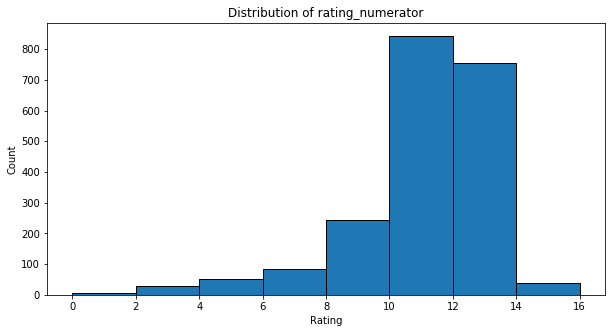

In [188]:
plt.figure(figsize=[10, 5])
bin_size=2
bins=np.arange(df['rating_numerator'].min(), df['rating_numerator'].max()+bin_size, bin_size)
hist_plot('rating_numerator', bins)
plt.title('Distribution of rating_numerator')
plt.xlabel('Rating')
plt.legend(frameon=False)
plt.ylabel('Count')

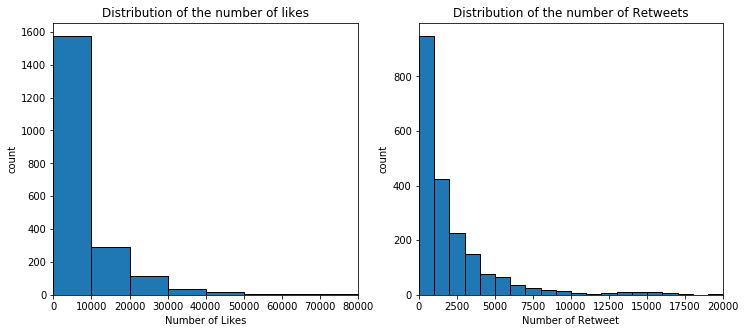

In [189]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
bin_size=10000
bins=np.arange(df['favorite_count'].min(), df['favorite_count'].max()+bin_size, bin_size)
hist_plot('favorite_count', bins)
plt.xlim(0, 80000)
plt.xlabel('Number of Likes')
plt.ylabel('count')
plt.title('Distribution of the number of likes') 

plt.subplot(1, 2, 2)
bin_size=1000
bins=np.arange(df['retweet_count'].min(), df['retweet_count'].max()+bin_size, bin_size)
hist_plot('retweet_count', bins)
plt.xlim(0, 20000)
plt.xlabel('Number of Retweet')
plt.ylabel('count')
plt.title('Distribution of the number of Retweets');

In [190]:
#df.dropna(subset=['retweet_count'], inplace = True)

### Bivariate Exploration

In [191]:
def reg_plot(x, y):
    #plt.figure(figsize=[10, 5])
    plt.hist2d(data=df, x=x, y=y, cmin=0.5, cmap='viridis_r');
    

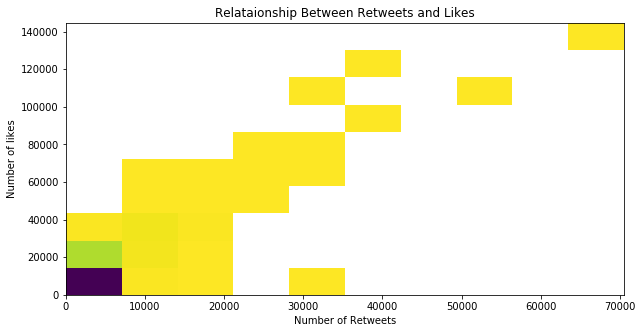

In [192]:
plt.figure(figsize=[10, 5])
reg_plot('retweet_count', 'favorite_count')
plt.title('Relataionship Between Retweets and Likes')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of likes');

In [193]:
i=df.retweet_count.corr(df.favorite_count, method='pearson')
i
#Series.corr(other, method='pearson', min_periods=None)[source]¶

0.85868688165606499

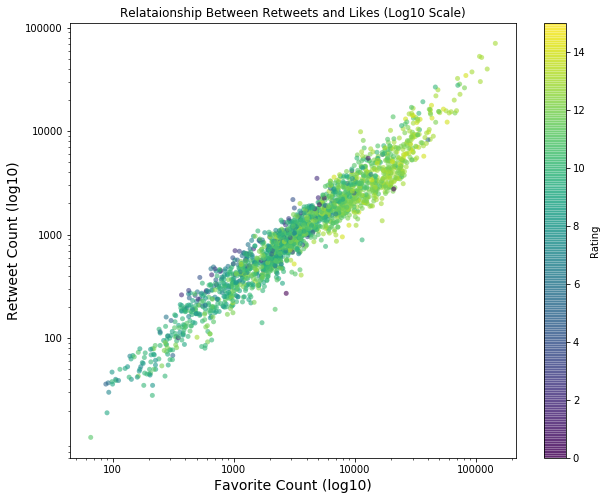

In [194]:
plt.figure(figsize = (10, 8))
# Generate the x-ticks for the graph
ticks = [100, 1000, 10000, 100000]
# Convert ticks into string values and to be displayed on the X axis
labels = ['{}'.format(v) for v in ticks]

plt.xscale('log')
plt.yscale('log')

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = df['rating_numerator'], s = 25, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.title('Relataionship Between Retweets and Likes (Log10 Scale)')
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')
plt.xticks(ticks, labels)
plt.yticks(ticks, labels)

plt.show();

''

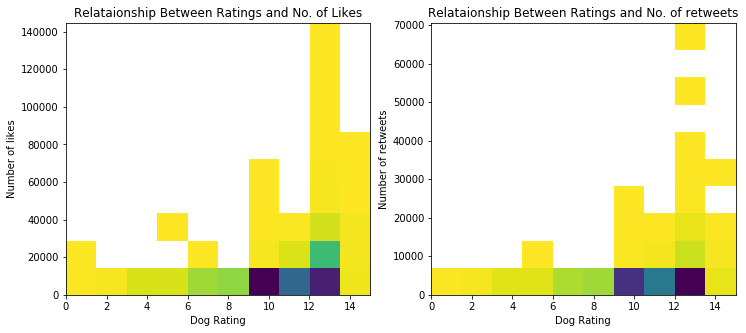

In [195]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
reg_plot('rating_numerator', 'favorite_count')
plt.title('Relataionship Between Ratings and No. of Likes')
plt.xlabel('Dog Rating')
plt.ylabel('Number of likes')

plt.subplot(1, 2, 2)
reg_plot('rating_numerator', 'retweet_count')
plt.title('Relataionship Between Ratings and No. of retweets')
plt.xlabel('Dog Rating')
plt.ylabel('Number of retweets')
;

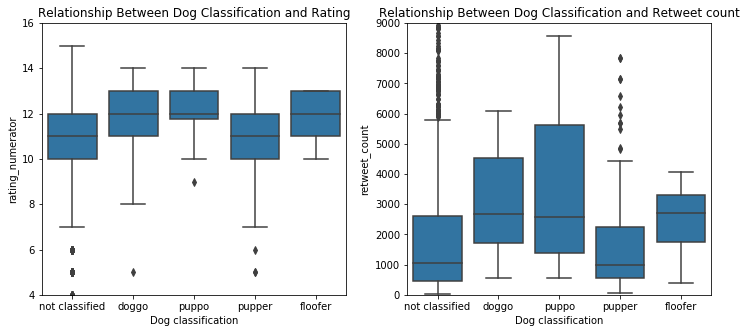

In [196]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x='dog_name', y='rating_numerator', color=base_color)
plt.xlabel('Dog classification')
plt.title('Relationship Between Dog Classification and Rating')
plt.ylim(4, 16)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='dog_name', y='retweet_count', color=base_color)
plt.xlabel('Dog classification')
plt.title('Relationship Between Dog Classification and Retweet count')
plt.ylim(0, 9000);
